In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly as py # for graph
import plotly.graph_objs as go # for graph
import requests
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
plt.style.use('bmh')

Using TensorFlow backend.


In [2]:
# bitcoin url
# https://poloniex.com/support/api
bitcoin_url = 'https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1405699200&end=9999999999&period=86400'

request = requests.get(bitcoin_url)
request

<Response [200]>

In [3]:
js = request.json()
js

[{'date': 1424304000,
  'high': 244,
  'low': 225,
  'open': 225,
  'close': 244,
  'volume': 46.27631267,
  'quoteVolume': 0.19311748,
  'weightedAverage': 239.62777823},
 {'date': 1424390400,
  'high': 245,
  'low': 240.25,
  'open': 240.25011809,
  'close': 240.25,
  'volume': 55.894897,
  'quoteVolume': 0.23042935,
  'weightedAverage': 242.56847926},
 {'date': 1424476800,
  'high': 245,
  'low': 245,
  'open': 245,
  'close': 245,
  'volume': 14.72223865,
  'quoteVolume': 0.06009077,
  'weightedAverage': 245},
 {'date': 1424563200,
  'high': 249,
  'low': 235,
  'open': 245,
  'close': 235,
  'volume': 129.12124785,
  'quoteVolume': 0.53905499,
  'weightedAverage': 239.53260845},
 {'date': 1424649600,
  'high': 235.001,
  'low': 235,
  'open': 235.00000236,
  'close': 235,
  'volume': 96.56756248,
  'quoteVolume': 0.41092569,
  'weightedAverage': 235.00006166},
 {'date': 1424736000,
  'high': 239.75,
  'low': 235,
  'open': 235,
  'close': 239.75,
  'volume': 149.15439319,
  'quote

In [4]:
df = pd.DataFrame(js)
df.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1424304000,244.000,225.00,225.000000,244.00,46.276313,0.193117,239.627778
1,1424390400,245.000,240.25,240.250118,240.25,55.894897,0.230429,242.568479
2,1424476800,245.000,245.00,245.000000,245.00,14.722239,0.060091,245.000000
3,1424563200,249.000,235.00,245.000000,235.00,129.121248,0.539055,239.532608
4,1424649600,235.001,235.00,235.000002,235.00,96.567562,0.410926,235.000062


In [5]:
df.shape

(1838, 8)

In [6]:
# scaling
scaler = MinMaxScaler()
df[['close']] = scaler.fit_transform(df[['close']])

In [7]:
df.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1424304000,244.000,225.00,225.000000,0.003428,46.276313,0.193117,239.627778
1,1424390400,245.000,240.25,240.250118,0.003231,55.894897,0.230429,242.568479
2,1424476800,245.000,245.00,245.000000,0.003480,14.722239,0.060091,245.000000
3,1424563200,249.000,235.00,245.000000,0.002955,129.121248,0.539055,239.532608
4,1424649600,235.001,235.00,235.000002,0.002955,96.567562,0.410926,235.000062


In [8]:
price = df['close'].values.tolist()
price

[0.0034278368698297933,
 0.0032309273586996947,
 0.0034803460727978203,
 0.0029552540431175573,
 0.0029552540431175573,
 0.003204672757215681,
 0.003099654351279629,
 0.00313903625350565,
 0.003690382884669925,
 0.003217803221637167,
 0.003795401290605977,
 0.004740566944030449,
 0.004647100562222272,
 0.005318168176678739,
 0.004110462809518489,
 0.004267984117318213,
 0.0042679843914162525,
 0.004267985745628597,
 0.004478021209064372,
 0.0058957694093270275,
 0.005108131365331727,
 0.00510813142361694,
 0.005061398178890919,
 0.005060873101038725,
 0.005428857595438652,
 0.005055622161838608,
 0.005055622163413884,
 0.00437772835204648,
 0.0045224602637016775,
 0.004454960511881502,
 0.004435645089785174,
 0.004662687837208973,
 0.004303349663071908,
 0.003350412436521174,
 0.0036103333860821093,
 0.0033504120500534394,
 0.003918939692428852,
 0.00367612641447527,
 0.00363626322497196,
 0.003971453807632816,
 0.0037081588072975617,
 0.003690382884669925,
 0.004005438102478082,
 0.00

In [9]:
window_size = 5
X = []
Y = []

for i in range(len(price)-window_size):
    X.append([price[i+j] for j in range(window_size)])

for i in range(len(price)-window_size):
    Y.append(price[window_size + i])    

In [10]:
X = np.asarray(X)
Y = np.asarray(Y)
print(X)
print(Y)

[[0.00342784 0.00323093 0.00348035 0.00295525 0.00295525]
 [0.00323093 0.00348035 0.00295525 0.00295525 0.00320467]
 [0.00348035 0.00295525 0.00295525 0.00320467 0.00309965]
 ...
 [0.51239732 0.49780881 0.47990965 0.45213111 0.45369395]
 [0.49780881 0.47990965 0.45213111 0.45369395 0.44718311]
 [0.47990965 0.45213111 0.45369395 0.44718311 0.43837046]]
[0.00320467 0.00309965 0.00313904 ... 0.44718311 0.43837046 0.44301493]


In [11]:
X.shape

(1833, 5)

In [12]:
Y.shape

(1833,)

In [13]:
train_test_split = 1000

# partition the training set
X_train = X[:train_test_split,:]
y_train = Y[:train_test_split]

# keep the last chunk for testing
X_test = X[train_test_split:,:]
y_test = Y[train_test_split:]

In [14]:
X_train.shape, y_train.shape

((1000, 5), (1000,))

In [15]:
# NOTE: to use keras's RNN LSTM module our input must be reshaped to [samples, window size, stepsize] 
X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], window_size, 1)))
X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], window_size, 1)))

In [16]:
model = Sequential()
model.add(LSTM(128, input_shape=(5,1,)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

In [17]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [18]:
# taining
model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=1)

Epoch 1/1
1000/1000 [==============================] - 25s 25ms/step - loss: 5.9813e-04


In [19]:
# 
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


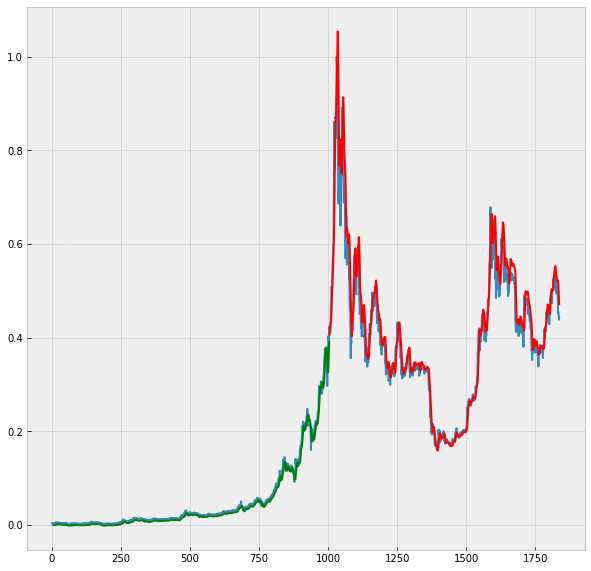

In [20]:
plt.figure(figsize=(10,10))
plt.plot(price)

# prediction of X_train
split_pt = train_test_split + window_size
plt.plot(np.arange(window_size, split_pt, 1), train_predict, color='g')

# real values of X_train = X_test
plt.plot(np.arange(split_pt, split_pt+len(test_predict), 1), test_predict, color='r')


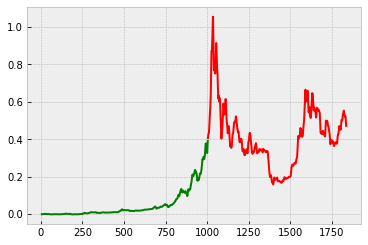

In [21]:
plt.plot(np.arange(window_size, split_pt, 1), train_predict, color='g')
plt.plot(np.arange(split_pt, split_pt+len(test_predict), 1), test_predict, color='r')


In [22]:
trace = go.Scatter(x=np.arange(window_size, split_pt,1), y=train_predict.reshape(1000), mode='lines', name='train')
trace2 = go.Scatter(x=np.arange(split_pt, split_pt+len(test_predict), 1), y=test_predict.reshape(833), mode='lines', name='test')
trace3 = go.Scatter(x=np.arange(1, len(price), 1), y=price, mode='lines', name='price')
data=[trace, trace2, trace3]
py.offline.plot(data)

'temp-plot.html'

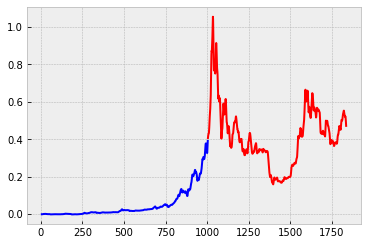

In [23]:
# plot training set prediction
split_pt = train_test_split + window_size 

plt.plot(np.arange(window_size,split_pt,1),train_predict,color = 'b')

# plot testing set prediction
plt.plot(np.arange(split_pt,split_pt + len(test_predict),1),test_predict,color = 'r')


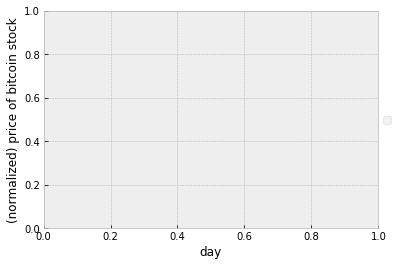

'temp-plot.html'

In [24]:
# pretty up graph
plt.xlabel('day')
plt.ylabel('(normalized) price of bitcoin stock')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

trace = go.Scatter(x=np.arange(1,len(price),1), y=price, mode = 'lines', name='original')
trace2 = go.Scatter(x=np.arange(window_size,split_pt,1), y=train_predict.reshape(1000), mode = 'lines', name='train')
trace3 = go.Scatter(x=np.arange(split_pt,split_pt + len(test_predict),1), y=test_predict.reshape(833), mode = 'lines', name='pred')

data = [trace, trace2, trace3]
py.offline.plot(data)